In [2]:
import pandas as pd
import numpy.random as rand
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
rand.seed(73)

def CreateDataSet(Number=1):
    output=[]
    
    for i in range(Number):
    
        #For Monthly 1st Date
        #date_range=pd.date_range(start='1/1/2009',end='12/31/21012',freq='MS')
        date_range=pd.date_range(start='1/1/2009',end='12/31/2012',freq='W-MON')
    
        random_data=rand.randint(low=25, high=100,size=len(date_range))
    
        status=[1,2,3]
    
        random_status=[status[rand.randint(low=0,high=len(status))] for i in range(len(date_range))]
    
        states=['GA','FL','fL','NY','NJ','TX']
    
        random_sates =  [states[rand.randint(low=0,high=len(states))] for i in range(len(date_range))]
    
        output.extend(zip(random_sates,random_status,random_data,date_range))

    return output
                      

In [4]:
dataset=CreateDataSet(4)

In [6]:
dataset[1:5]

[('NY', 1, 43, Timestamp('2009-01-12 00:00:00', freq='W-MON')),
 ('GA', 3, 71, Timestamp('2009-01-19 00:00:00', freq='W-MON')),
 ('NJ', 1, 35, Timestamp('2009-01-26 00:00:00', freq='W-MON')),
 ('FL', 2, 41, Timestamp('2009-02-02 00:00:00', freq='W-MON'))]

In [7]:
df=pd.DataFrame(data=dataset,columns=['State','Status','CustomerCount','StatusDate'])

In [8]:
df.head()

,State,Status,CustomerCount,StatusDate
0,NJ,2,47,2009-01-05
1,NY,1,43,2009-01-12
2,GA,3,71,2009-01-19
3,NJ,1,35,2009-01-26
4,FL,2,41,2009-02-02


In [9]:
df.to_excel('Lesson3.xlsx',index=False)

In [10]:
df2=pd.read_excel('Lesson3.xlsx',index_col='StatusDate')

Apply and Map are per series operations whereas applymap is full dataframe.

Apply works column wise and map works row wise on each column


In [11]:
#df2['State']=df2['State'].map(lambda x:x.upper())
df2['State']=df2['State'].apply(lambda x:x.upper())
#df2.applymap(lambda x:x.upper())

In [12]:
print(df2[df2['Status']==1].head())

           State  Status  CustomerCount
StatusDate                             
2009-01-12    NY       1             43
2009-01-26    NJ       1             35
2009-02-09    NY       1             33
2009-02-16    FL       1             92
2009-03-02    NY       1             63


In [13]:
df2['State'][df2['State']=='NJ']='NY'

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2['State'].unique()

array(['NY', 'GA', 'FL', 'TX'], dtype=object)

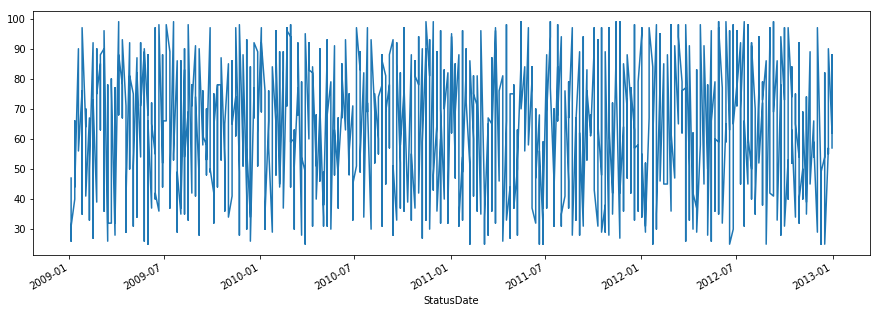

In [15]:
#sns.tsplot(data=df2['CustomerCount'])
df2['CustomerCount'].plot(figsize=(15,5))

In [16]:
#df2.sort_values(by='State')
#df2[df2['State']=='NY'].sort_values(by='State')
#df2[df2['State']=='NY'].sort_index(axis=0)
df2[df2['State']=='NY'].sort_values(by='CustomerCount').head()

,State,Status,CustomerCount
StatusDate,,,
2012-12-17,NY,1,25
2012-01-23,NY,1,25
2012-06-18,NY,2,25
2009-06-01,NY,1,25
2012-03-26,NY,1,26


# The RESet Index turns the status date into a column

In [50]:
daily=df2.reset_index().groupby(by=['State','StatusDate']).sum().sort_values(by='CustomerCount',ascending=True)

In [51]:
del daily['Status']

In [55]:
daily.head()

CustomerCount
State StatusDate               
TX    2010-03-29             25
NY    2012-01-23             25
TX    2011-06-27             25
      2012-08-27             25
FL    2009-01-05             26

In [57]:
daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-1

In [58]:
daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=209, freq=None)

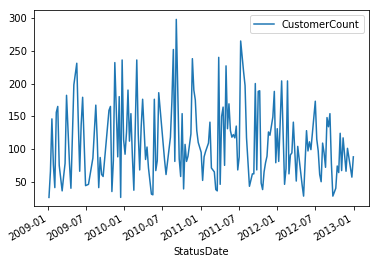

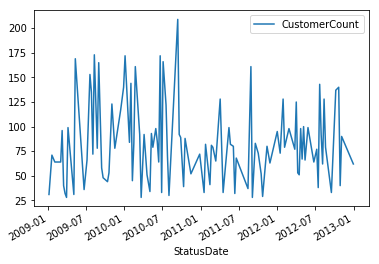

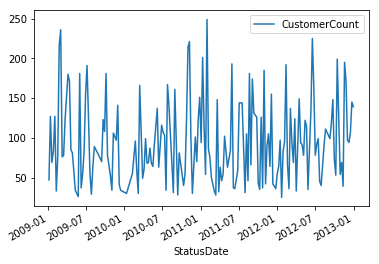

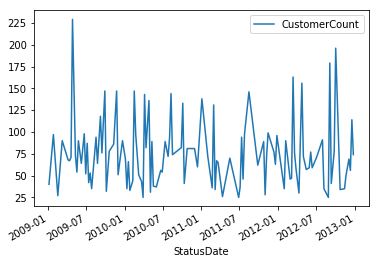

In [62]:
#daily.loc['TX']

daily.loc['FL'].plot()
daily.loc['GA'].plot()
daily.loc['NY'].plot()
daily.loc['TX'].plot();

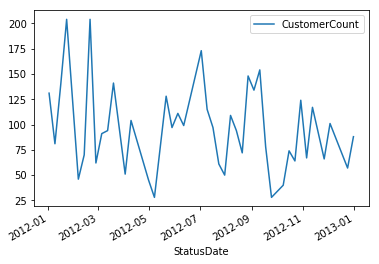

In [65]:
daily.loc['FL']['2012'].plot()


In [ ]:
ALL=pd.DataFrame(daily['CustomerCount'].)